In [1]:
import pandas as pd
import numpy as np
import os
import csv
import scipy.stats as scs
import scipy.optimize as sco
import matplotlib.pyplot as plt

In [2]:
dir_loc = '/Users/mashihao/Desktop/equity'
file_loc = [dir_loc + '/' + os.listdir(dir_loc)[i] for i in range(len(os.listdir(dir_loc))) ]
ticker = [item[:-6] for item in os.listdir(dir_loc)]
# file_loc
ticker

['BP', 'BABA', 'SBUX', 'GE', 'EDU', 'TAL', 'XOM', 'KO', 'AMZN', 'GOOG', 'MET']

In [3]:
ticker[3]
df=pd.read_csv(file_loc[3],sep= '\t'and ',') 
list(df.head())
df.head()
df.loc[:,['Date','Adj Close']]

,Date,Adj Close
0,2013-06-17,19.686157
1,2013-06-18,20.149946
2,2013-06-19,19.860079
3,2013-06-20,19.409283
4,2013-06-21,19.501118
5,2013-06-24,19.142149
6,2013-06-25,19.292410
7,2013-06-26,19.409283
8,2013-06-27,19.467720
9,2013-06-28,19.359198


In [4]:
df=pd.read_csv(file_loc[0],sep= '\t'and ',') 
data = pd.DataFrame(df['Date'])
data.set_index('Date')


for i in range(len(file_loc)):
    df=pd.read_csv(file_loc[i], sep= '\t'and ',') 
    temp = df.loc[:,['Date', 'Adj Close']]
    temp.columns = ['Date', ticker[i]]
    data = pd.merge(data, temp, on='Date', how='inner') 

data.head()

,Date,BP,BABA,SBUX,GE,EDU,TAL,XOM,KO,AMZN,GOOG,MET
0,2014-09-19,36.366783,93.889999,35.513397,22.866884,21.234915,5.787741,84.396446,37.208324,331.320007,592.820374,43.826313
1,2014-09-22,36.108471,89.889999,34.827129,22.684229,21.371347,5.625118,83.892426,37.358757,324.500000,584.157959,43.239048
2,2014-09-23,35.787544,87.169998,34.528343,22.632040,21.342112,5.610482,83.449226,37.066753,323.630005,577.952087,42.871025
3,2014-09-24,35.623161,90.570000,35.163261,22.553759,21.244658,5.680410,83.266731,37.403000,328.209991,584.774597,43.419144
4,2014-09-25,34.488178,88.919998,34.603035,22.223236,21.254402,5.659269,81.902428,36.969418,321.929993,571.915283,42.362045


In [5]:
data_ex_Date = data.drop('Date',1)

In [6]:
returns = np.log(data_ex_Date / data_ex_Date.shift(1))
returns

,BP,BABA,SBUX,GE,EDU,TAL,XOM,KO,AMZN,GOOG,MET
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.007128,-0.043537,-0.019513,-0.008020,0.006404,-0.028500,-0.005990,0.004035,-0.020799,-0.014720,-0.013490
2,-0.008928,-0.030726,-0.008616,-0.002303,-0.001369,-0.002605,-0.005297,-0.007847,-0.002685,-0.010680,-0.008548
3,-0.004604,0.038263,0.018221,-0.003465,-0.004577,0.012387,-0.002189,0.009030,0.014053,0.011735,0.012704
4,-0.032379,-0.018386,-0.016060,-0.014763,0.000459,-0.003729,-0.016520,-0.011660,-0.019320,-0.022236,-0.024648
5,0.006786,0.017171,0.014067,0.003126,0.015017,-0.011561,0.012442,0.010003,0.003968,0.003541,0.001847
6,0.004050,-0.019084,0.001329,-0.008227,0.008097,0.016148,-0.010534,0.001184,-0.004310,-0.001283,-0.005365
7,-0.013335,0.001126,0.002521,0.007837,0.038669,-0.000572,-0.004032,0.009657,0.001925,0.001733,-0.003531
8,-0.006162,-0.031440,-0.011328,-0.018118,-0.006053,-0.015866,-0.012734,0.001873,-0.015565,-0.015869,-0.028320
9,-0.011976,0.011088,-0.002147,-0.001591,0.025264,-0.002912,0.004727,-0.001873,0.002988,0.003180,0.006300


In [7]:
returns.mean()*252

BP      0.057816
BABA    0.213012
SBUX    0.127224
GE     -0.145128
EDU     0.424976
TAL     0.509123
XOM    -0.012127
KO      0.045628
AMZN    0.440437
GOOG    0.177977
MET     0.014762
dtype: float64

In [8]:
returns.cov()*252

,BP,BABA,SBUX,GE,EDU,TAL,XOM,KO,AMZN,GOOG,MET
BP,0.061978,0.021164,0.012378,0.021665,0.015131,0.014670,0.033249,0.009829,0.017350,0.013935,0.029307
BABA,0.021164,0.098181,0.017279,0.015872,0.031861,0.035304,0.013748,0.007327,0.033353,0.029823,0.021889
SBUX,0.012378,0.017279,0.039746,0.014652,0.013498,0.010181,0.010264,0.008861,0.024401,0.020879,0.018755
GE,0.021665,0.015872,0.014652,0.048083,0.009129,0.012855,0.016674,0.008506,0.012686,0.015309,0.022773
EDU,0.015131,0.031861,0.013498,0.009129,0.128225,0.075470,0.010393,0.006740,0.021458,0.020516,0.016293
TAL,0.014670,0.035304,0.010181,0.012855,0.075470,0.145051,0.008060,0.007373,0.019897,0.019042,0.013681
XOM,0.033249,0.013748,0.010264,0.016674,0.010393,0.008060,0.036559,0.009100,0.012403,0.013647,0.022063
KO,0.009829,0.007327,0.008861,0.008506,0.006740,0.007373,0.009100,0.018948,0.009326,0.009727,0.009293
AMZN,0.017350,0.033353,0.024401,0.012686,0.021458,0.019897,0.012403,0.009326,0.079826,0.039259,0.018205
GOOG,0.013935,0.029823,0.020879,0.015309,0.020516,0.019042,0.013647,0.009727,0.039259,0.051915,0.020532


In [9]:
port_returns = []
port_variance = []
n = len(ticker)
for p in range(10000):
    weights = np.random.random(n)
    weights /=np.sum(weights)
    port_returns.append(np.sum(returns.mean()*252*weights))
    port_variance.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights))))

port_returns = np.array(port_returns)
port_variance = np.array(port_variance)


In [10]:
def statistics(weights):
    weights = np.array(weights)
    port_returns = np.sum(returns.mean()*weights)*252
    port_variance = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252,weights)))
    return np.array([port_returns, port_variance, port_returns/port_variance])

def min_sharpe(weights):
    return -statistics(weights)[2]

cons = ({'type':'eq', 'fun':lambda x: np.sum(x)-1})

bnds = tuple((0,1) for x in range(n))

opts = sco.minimize(min_sharpe, n*[1./n,], method = 'SLSQP', bounds = bnds, constraints = cons)

def min_variance(weights):
    return statistics(weights)[1]

optv = sco.minimize(min_variance, n*[1./n,],method = 'SLSQP', bounds = bnds, constraints = cons)

target_returns = np.linspace(0.0,0.5,50)
target_variance = []
for tar in target_returns:
    cons = ({'type':'eq','fun':lambda x:statistics(x)[0]-tar},{'type':'eq','fun': lambda x:np.sum(x)-1})
    res = sco.minimize(min_variance, n*[1./n,],method = 'SLSQP', bounds = bnds, constraints = cons)
    target_variance.append(res['fun'])

target_variance = np.array(target_variance)

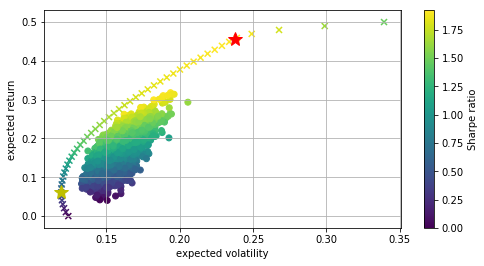

In [11]:
risk_free = 0.015
plt.figure(figsize = (8,4))
plt.scatter(port_variance, port_returns, c = port_returns/port_variance,marker = 'o')
plt.scatter(target_variance,target_returns, c = target_returns/target_variance, marker = 'x')
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0], 'r*', markersize = 15.0)
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0], 'y*', markersize = 15.0)
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label = 'Sharpe ratio')
plt.show()

In [12]:
print('Optimal Sharp Ratio:')
for i in range(len(ticker)):
    print(ticker[i],':',opts['x'].round(3)[i])
print()
print('Expected Return', statistics(opts['x']).round(3)[0])
print('Expected Volitility', statistics(opts['x']).round(3)[1])
print('Sharp Ratio', statistics(opts['x']).round(3)[2])

Optimal Sharp Ratio:
BP : 0.0
BABA : 0.0
SBUX : 0.0
GE : 0.0
EDU : 0.151
TAL : 0.277
XOM : 0.0
KO : 0.0
AMZN : 0.572
GOOG : 0.0
MET : 0.0

Expected Return 0.457
Expected Volitility 0.238
Sharp Ratio 1.923


In [13]:
print('Minimum Variance Portfolio:')
for i in range(len(ticker)):
    print(ticker[i],':',optv['x'].round(3)[i])
print()
print('Expected Return', statistics(optv['x']).round(3)[0])
print('Expected Volitility', statistics(optv['x']).round(3)[1])
print('Sharp Ratio', statistics(optv['x']).round(3)[2])

Minimum Variance Portfolio:
BP : 0.0
BABA : 0.021
SBUX : 0.128
GE : 0.082
EDU : 0.028
TAL : 0.022
XOM : 0.15
KO : 0.54
AMZN : 0.008
GOOG : 0.02
MET : 0.0

Expected Return 0.062
Expected Volitility 0.119
Sharp Ratio 0.522
